In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
import numpy as np
# I import my package:

import averagedistorsion as ad

In [25]:
PATH = r"C:\Users\Theo Delemazure\Documents\Thèse\Avril 2022\social"
restaurants = np.genfromtxt(PATH+"\CD-00003-00000002.csv", delimiter=',', dtype=int)[1:,1:]
bars = np.genfromtxt(PATH+"\CD-00003-00000003.csv", delimiter=',', dtype=int)[1:,1:]

with open('../../../Mai 2022/opinions.json', 'r') as f:
    dict_opinions = json.load(f)
candidats = ['Philippe Poutou', 'Nathalie Arthaud', 'Fabien Roussel', 'Jean-Luc Mélenchon', 'Anne Hidalgo', 'Yannick Jadot', 'Emmanuel Macron', 'Jean Lassalle', 'Valérie Pecresse', 'Nicolas Dupont-Aignan', 'Marine Le Pen', 'Eric Zemmour']
votes = np.array([e['opinions'] for e in dict_opinions])
president = votes /20

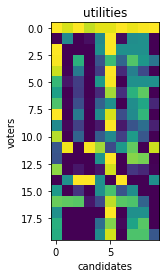

In [9]:
model = ad.ModelFromDataset(president)
profile = model(n_voters=20, n_candidates=10)
profile
plt.imshow(profile)
plt.xlabel("candidates")
plt.ylabel("voters")
plt.title("utilities")
plt.show()

In [32]:
rules = [#ad.RuleAlwaysWorst(),
         #ad.RuleLottery(), 
         #ad.RuleDictatorRandom(),
         #ad.RuleEgalitarian(),
         #ad.RuleVeto(), 
         ad.RulePlurality(), 
         ad.RulePluralityWithRunoff(), 
         ad.RulePluralityVeto(),
         ad.RuleSTV(), 
         ad.RuleHarmonic(), 
         ad.RuleHalfApproval(), 
         ad.RuleBucklin(),
         ad.RuleMaximin(), 
         ad.RuleRankedPairs(),
         ad.RuleCopeland(),
         #ad.RuleMedian(), 
         ad.RuleBorda(), 
         ad.RuleRandomVoterUtility(),
         #ad.RuleNashProduct()
         ]
n_voters = 20 #Number of voters
max_cand = 10 #Maximum number of candidates
n_tries = 10000 #Number of experiments for each rule and n_candidate

In [33]:
experiment = ad.ExperimentRelevantCandidates(rules, 
                                             n_candidates=max_cand,
                                             n_voters=n_voters,
                                             n_tries=n_tries)

100%|██████████| 12/12 [09:32<00:00, 47.74s/it]


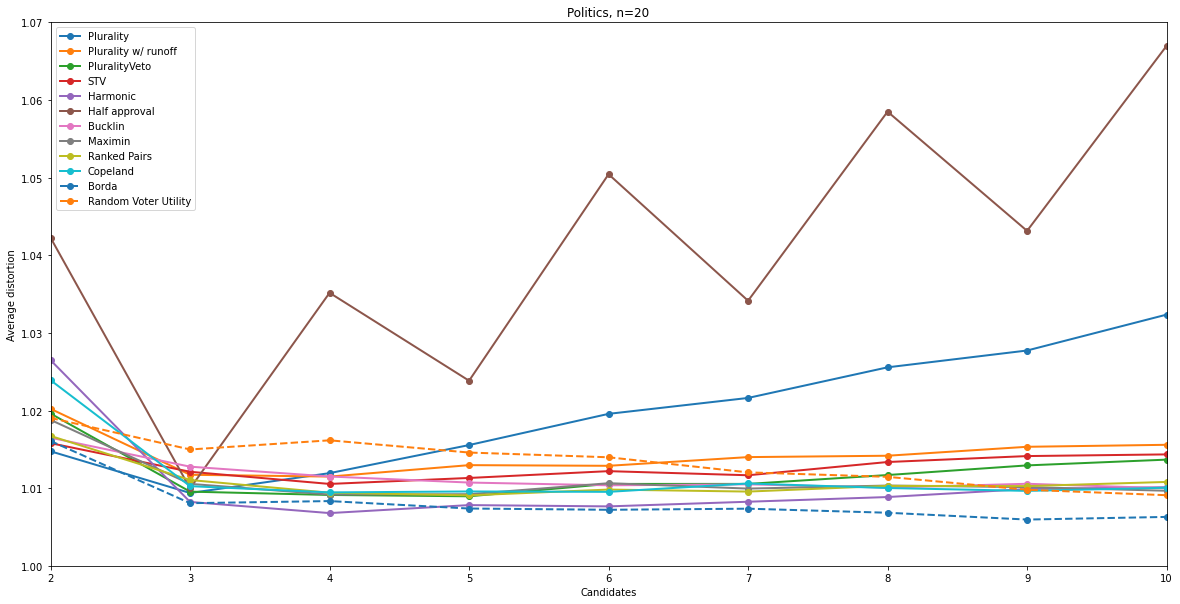

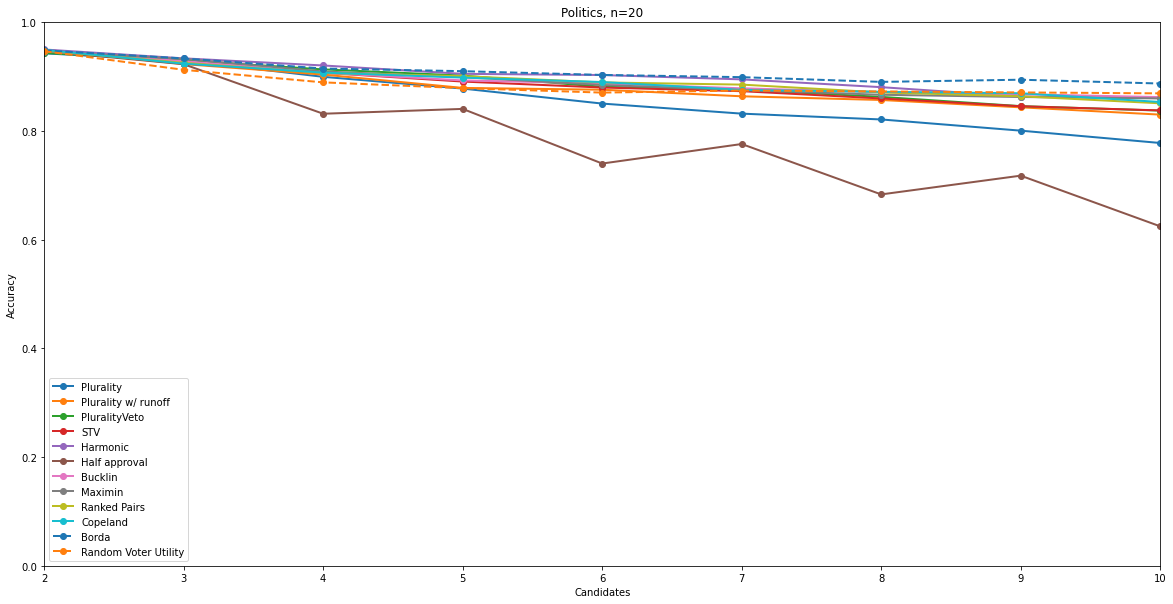

In [34]:
experiment(ad.ModelFromDataset(president, noise=0.1))
experiment.show_distortion("Politics")
experiment.show_accuracy("Politics")

In [29]:
rules = [#ad.RuleAlwaysWorst(),
         #ad.RuleLottery(), 
         #ad.RuleDictatorRandom(),
         #ad.RuleEgalitarian(),
         #ad.RuleVeto(), 
         ad.RulePlurality(), 
         ad.RulePluralityVeto(),
         ad.RuleSTV(), 
         ad.RuleHarmonic(), 
         ad.RuleHalfApproval(), 
         ad.RuleRankedPairs(),
         ad.RuleCopeland(),
         #ad.RuleMedian(), 
         ad.RuleBorda(), 
         ad.RuleRandomVoterUtility(),
         #ad.RuleNashProduct()
         ]

n_candidates = 2
n_irrelevant_candidates = 8
n_voters = 20
n_tries = 10000

In [30]:
experiment = ad.ExperimentIrrelevantCandidates(rules, 
                                                n_candidates=n_candidates,
                                                n_irrelevant_candidates=n_irrelevant_candidates,
                                                n_voters=n_voters,
                                                n_tries=n_tries)

100%|██████████| 9/9 [07:15<00:00, 48.38s/it]


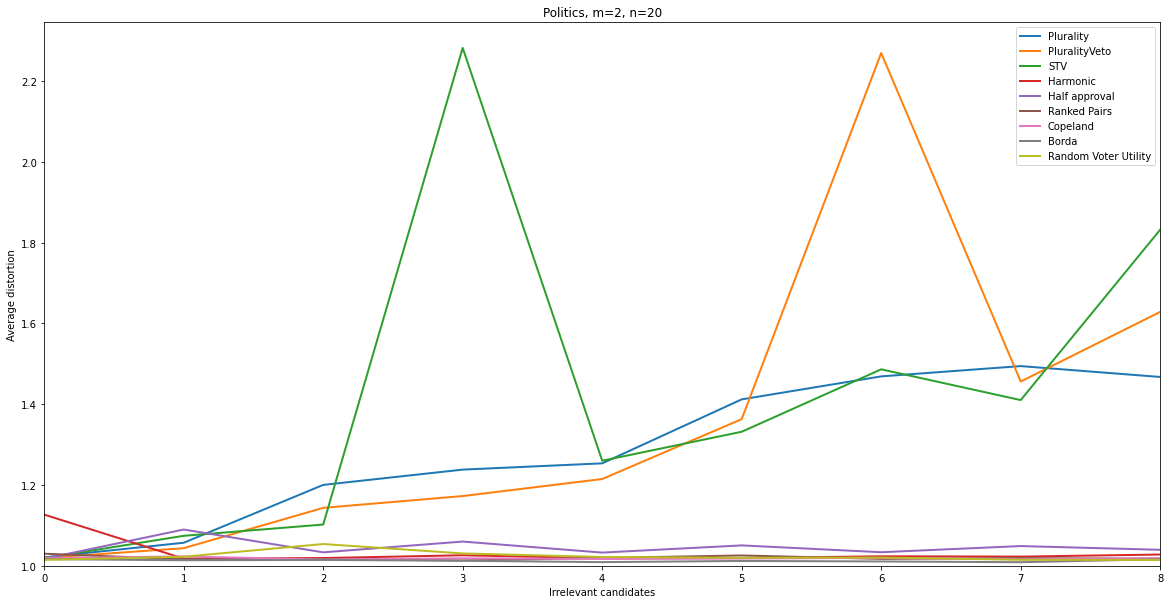

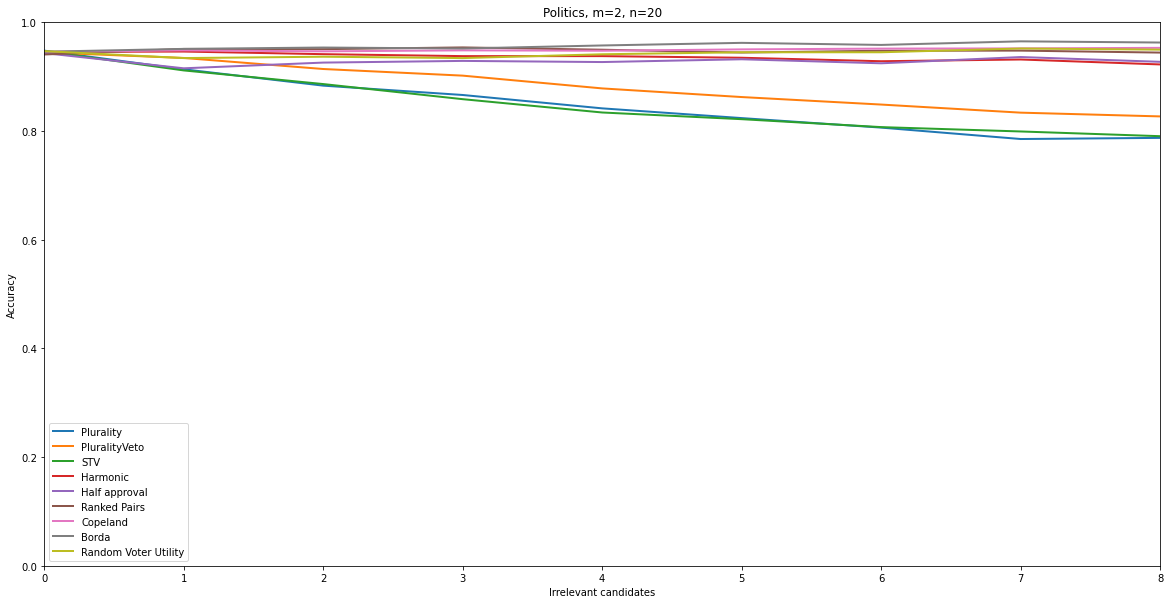

In [31]:
experiment(ad.ModelFromDataset(president, noise=0.1))
experiment.show_distortion("Politics")
experiment.show_accuracy("Politics")

In [ ]:
n_voters = 20 #Number of voters
max_cand = 10 #Maximum number of candidates
n_tries = 10000 #Number of experiments for each rule and n_candidate
phi=0.25
res = []
for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.fromDataset(restaurants, noise=0.1))
    tab_evol = []
    for n_candidates in tqdm(range(2,max_cand+1)):
        elector(n_voters=n_voters, n_candidates=n_candidates, n_tries=n_tries)
        tab_evol.append(elector.averageDistortion_)
    res.append(tab_evol)
    

(1.0, 2.2327292584926353)

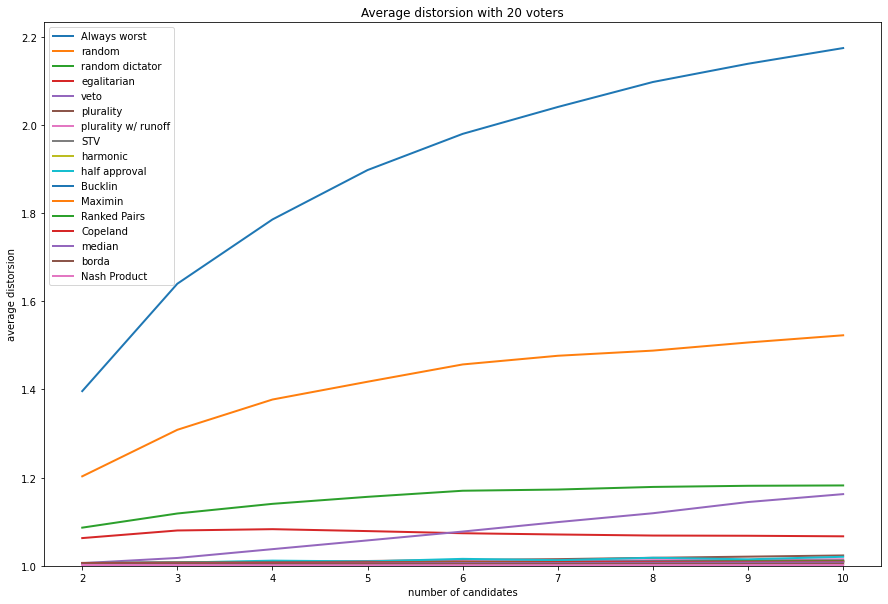

In [6]:
plt.figure(figsize=(15,10))
for j in range(len(rules)):
    plt.plot(range(2,max_cand+1),res[j], label=rules[j].name,linewidth=2)
plt.ylabel("average distorsion")
plt.title("Average distorsion with "+str(n_voters)+" voters")
plt.xlabel("number of candidates")
plt.legend()
plt.ylim(1)

(1.0, 1.0244403016721892)

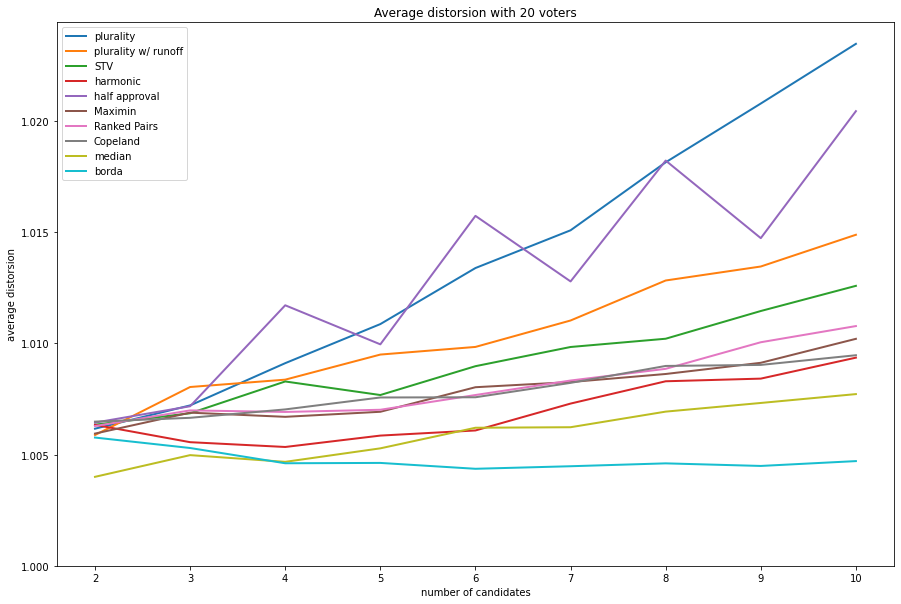

In [7]:
plt.figure(figsize=(15,10))
for j in range(3, len(rules)):
    if (j in [4,3,16,10]):#[4,9]):
        continue
    plt.plot(range(2,max_cand+1),res[j], label=rules[j].name,linewidth=2)
plt.ylabel("average distorsion")
plt.title("Average distorsion with "+str(n_voters)+" voters")
plt.xlabel("number of candidates")
plt.legend()
plt.ylim(1)

In [8]:
n_voters = 20 #Number of voters
max_cand = 10 #Maximum number of candidates
n_tries = 10000 #Number of experiments for each rule and n_candidate
phi=0.25
res = []
for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.fromDataset(bars, noise=0.1))
    tab_evol = []
    for n_candidates in tqdm(range(2,max_cand+1)):
        elector(n_voters=n_voters, n_candidates=n_candidates, n_tries=n_tries)
        tab_evol.append(elector.averageDistortion_)
    res.append(tab_evol)
    

100%|██████████| 9/9 [00:05<00:00,  1.59it/s]


(1.0, 1.7586219992008931)

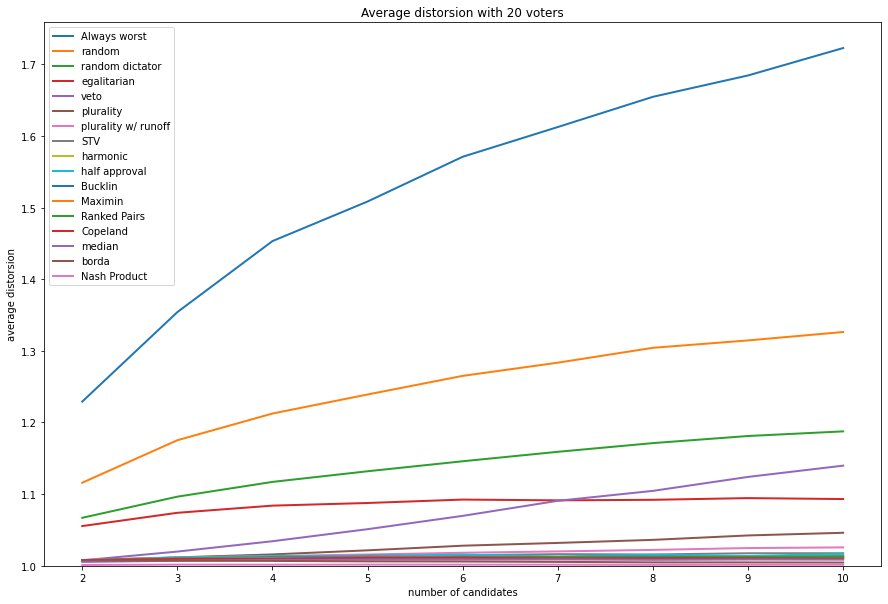

In [9]:
plt.figure(figsize=(15,10))
for j in range(len(rules)):
    plt.plot(range(2,max_cand+1),res[j], label=rules[j].name,linewidth=2)
plt.ylabel("average distorsion")
plt.title("Average distorsion with "+str(n_voters)+" voters")
plt.xlabel("number of candidates")
plt.legend()
plt.ylim(1)

(1.0, 1.0481597180840092)

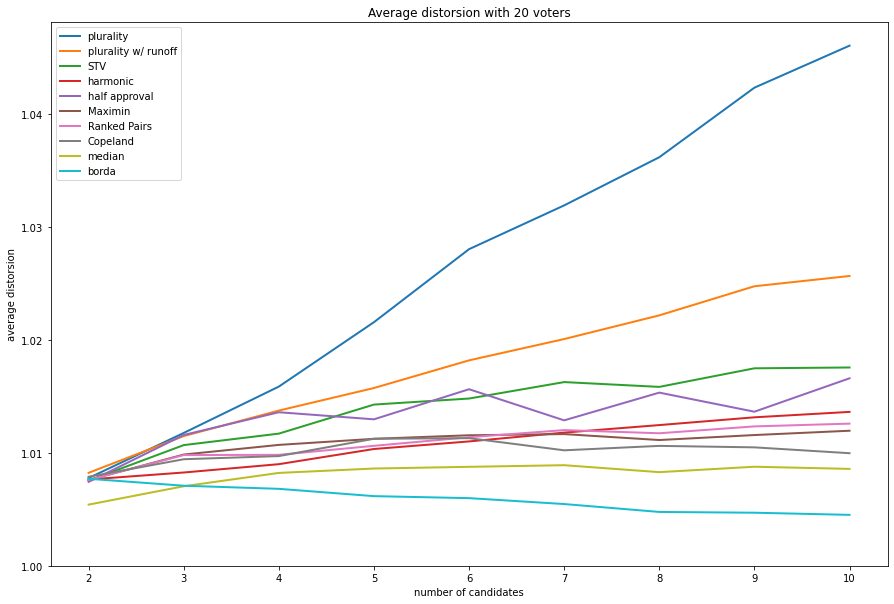

In [10]:
plt.figure(figsize=(15,10))
for j in range(3, len(rules)):
    if (j in [4,3,16,10]):#[4,9]):
        continue
    plt.plot(range(2,max_cand+1),res[j], label=rules[j].name,linewidth=2)
plt.ylabel("average distorsion")
plt.title("Average distorsion with "+str(n_voters)+" voters")
plt.xlabel("number of candidates")
plt.legend()
plt.ylim(1)

In [11]:
rules = [
    ad.plurality(), 
    ad.veto(), 
    ad.stv(), 
    ad.halfApproval(), 
    ad.harmonic(),
    ad.schulze(),
    ad.rankedPairs(),
    ad.copeland(),
    ad.maximin(),
    ad.borda()
]

In [12]:
res =[]
accuracy = []
n_candidates = 2 # REAL candidates
max_cand = 8 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 10000 # Number of experiments

for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.fromDataset(bars, noise=0.1))
    tab_evol = []
    tab_accuracy = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
        tab_accuracy.append(elector.accuracy_)
    res.append(tab_evol)
    accuracy.append(tab_accuracy)

100%|██████████| 8/8 [00:20<00:00,  2.51s/it]


In [13]:
def plot_results(max_cand, distortion, accuracy, n_voters, n_candidate, model_name):
    plt.figure(figsize=(20,10))
    for j in range(len(rules)):
        plt.plot(range(max_cand), distortion[j], label=rules[j].name, linewidth=2)
    plt.legend()
    plt.title("%s, m=%i, n=%i"%(model_name, n_candidates, n_voters))
    plt.xlabel("Irrelevant alternatives")
    plt.ylabel("Average distortion")
    plt.ylim(1)
    plt.show()
    plt.figure(figsize=(20,10))
    for j in range(len(rules)):
        plt.plot(range(max_cand), accuracy[j], label=rules[j].name, linewidth=2)
    plt.legend()
    plt.title("%s, m=%i, n=%i"%(model_name, n_candidates, n_voters))
    plt.xlabel("Irrelevant alternatives")
    plt.ylabel("Accuracy")
    plt.show()

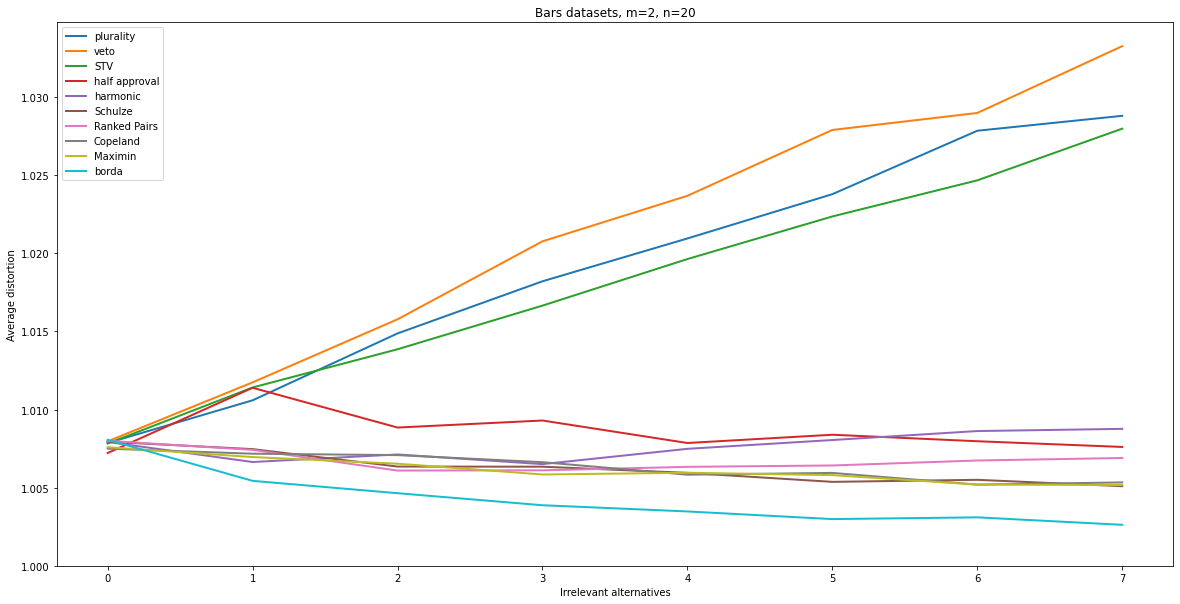

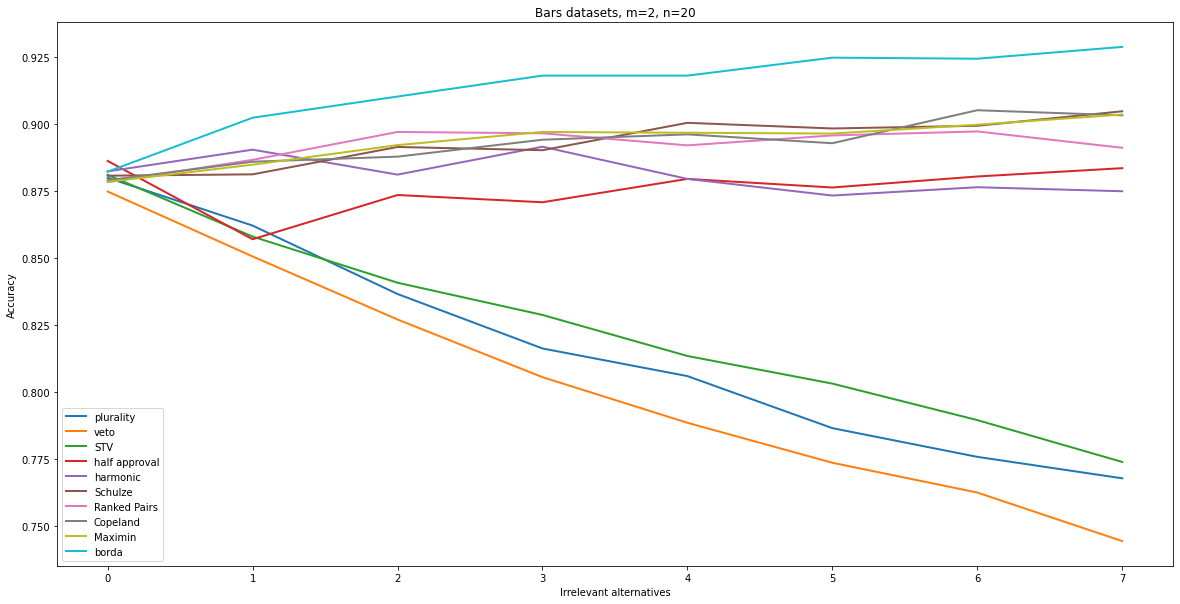

In [14]:
plot_results(max_cand, res, accuracy, n_voters, n_candidates, "Bars datasets")

In [15]:
res =[]
accuracy = []
n_candidates = 2 # REAL candidates
max_cand = 8 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 10000 # Number of experiments

for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.fromDataset(restaurants, noise=0.1))
    tab_evol = []
    tab_accuracy = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
        tab_accuracy.append(elector.accuracy_)
    res.append(tab_evol)
    accuracy.append(tab_accuracy)

100%|██████████| 8/8 [00:20<00:00,  2.57s/it]


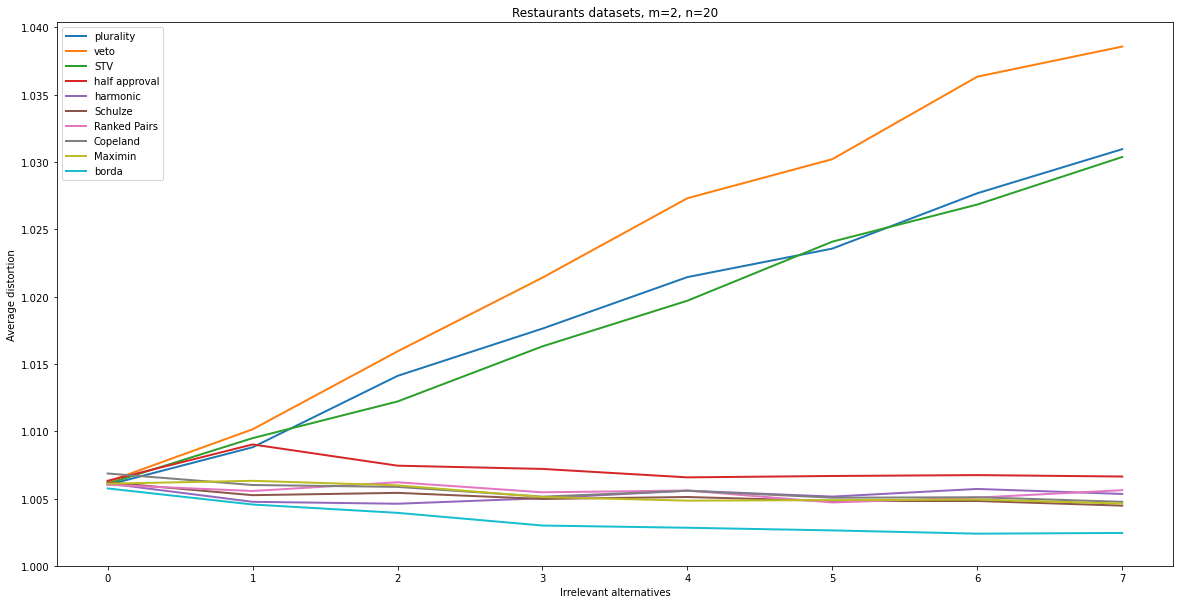

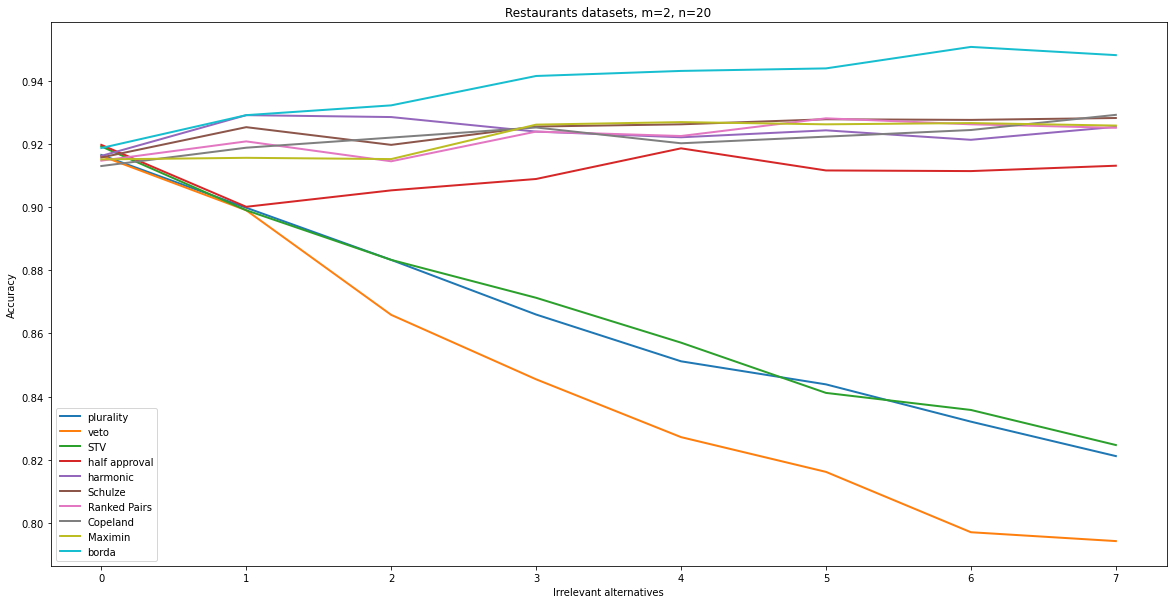

In [16]:
plot_results(max_cand, res, accuracy, n_voters, n_candidates, "Restaurants datasets")